# Desafio 1: Properti

## Objetivos:
-  Efectuar una limpieza del dataset provisto. Particularmente, deberá diseñar estrategias para lidiar con los datos perdidos en ciertas variables.

-  Realizar un análisis descriptivo de las principales variables.

- Crear nuevas columnas a partir de las características dadas que puedan tener valor predictivo.

## Preparacion de ambiente
### Importar Librerias
**Numpy** y **Pandas** son importadas para administrar todas las operaciones analiticas 

**IPython** es utilizados para administrar la visualizacion de los datos

In [87]:
import numpy as np
import pandas as pd
from IPython.display import display

### Importar archivo CSV
Utilizando Pandas importamos el archivo CSV considerando la comma como delimitador 

In [88]:
dfprop=pd.read_csv(filepath_or_buffer='properatti.csv',delimiter=',',index_col = 0 )

## Visualizacion
### Visualizar la forma del Dataframe
Se utilizara la funcion nativa **shape** de la clase DataFrame para visualizar:
- Cantidad de observaciones 
- Cantidad de variables

In [89]:
dfprop.shape

(121220, 25)

### Visualizar estructura del Dataframe
Se utilizara la funcion nativa **info()** de la clase DataFrame para visualizar:
- Cantidad de variables
- Nombre de variables
- Cantidad de registros con valores **No nulos**
- Tipo de dato

In [90]:
dfprop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121220 entries, 0 to 121219
Data columns (total 25 columns):
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 non-null float64
price_usd_per_m2              68617 n

## Visualizacion de valores Nan en cada variable

Visualizamos la cantidad de valores Nan para cada variable  

In [91]:
dfprop[dfprop.isnull().any(axis=1)].isna().sum()

operation                       0
property_type                   0
place_name                     23
place_with_parent_names         0
country_name                    0
                            ...  
expenses                   106958
properati_url                   0
description                     2
title                           0
image_thumbnail              3112
Length: 25, dtype: int64

## Limpieza de datos
### Eliminacion de inmuebles sin valor analitico

Eliminamos los inmuebles sin precio ni ubicaciones, ya que no tenemos ninguna forma de estimar un precio.

Condicion:
- price == Nan
- price_aprox_local_currency == Nan
- price_aprox_usd == Nan
- surface_total_in_m2 == Nan
- surface_covered_in_m2 == Nan


Los registros eliminados son 4733 

In [92]:
# Generamos una mascara para encontrar todos los registros bajo esta condicion
dfprop_withoutprice_withoutsurface=((dfprop['price'].isna()==True)\
                                    &(dfprop['price_aprox_local_currency'].isna()==True)\
                                    &(dfprop['price_aprox_usd'].isna()==True)\
                                    &(dfprop['surface_total_in_m2'].isna()==True)\
                                    &(dfprop['surface_covered_in_m2'].isna()==True))

# Instanciamos el Dataframe excluyendo los registros que no cumple con dicha condicion
dfprop=dfprop.loc[~dfprop_withoutprice_withoutsurface]


Visualizamos la forma para confirmar que se hayan eliminado los registros

In [93]:
dfprop.shape

(116487, 25)

### Separar en un nuevo Dataframe los inmuebles cuya concentracion por provincia sea menor a 30 operaciones 

Dejaremos en un nuevo DataFrame denominado 'dfprop_fewlocations' las propiedades cuya agrupacion por provincia sea menor a 30 por no tener un valor referencial para la estimacion de precios

In [94]:
#Creamos dataframe con un valor booleano que indica si la provincia tiene menos de 30 propiedades (True) o no (False).
dfprop_stateless30locations=dfprop.groupby('state_name')[['operation']].count()<30

# Renombramos la columna  
dfprop_stateless30locations.rename(columns={'state_name':'state_name','operation':'less_30_locations'},inplace=True)

# Hacemos un merge con dfprop para marcar cada una de las propiedades
dfprop=pd.merge(dfprop,dfprop_stateless30locations,how='left',on='state_name')
    
# Generamos un nuevo Dataframe para almacenar las propiedades correspondientes a provincias con menos de 30 propiedades
dfprop_fewlocations=dfprop.loc[dfprop['less_30_locations']==True]

# Eliminamos del dataframe proncipal dichas ubiaciones
dfprop=dfprop.loc[dfprop['less_30_locations']==False]

#Eliminamos las columnas de ambos dataframes
dfprop_fewlocations.drop(['less_30_locations'],axis=1,inplace=True)
dfprop.drop(['less_30_locations'],axis=1,inplace=True)

#Verificamos la cantidad de ubicaciones dentro del dataframe auxiliar
dfprop_fewlocations.shape

(74, 25)

In [95]:
#Corroboramos que se hayan eliminado las propiedades del dataframe principal
dfprop.shape

(116413, 25)

Eliminamos propiedad en moneda 'Pesos Uruguayos' 

In [96]:
dfprop=dfprop.loc[dfprop['currency']!='UYU']

#Corroboramos que se hayan eliminado las propiedades del dataframe principal
dfprop.shape

(116412, 25)

# Imputacion
## Variable place_name - valores Nan:  
- Analizamos los valores NaN de la columna 'place_name':

In [97]:
dfprop.loc[(dfprop['place_name'].isna() == True),['place_name','place_with_parent_names']]

,place_name,place_with_parent_names
6201,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
9686,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
10855,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
14066,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
17672,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
...,...,...
55036,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
55996,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
59189,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
59191,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||


- Vemos que, de acuerdo a 'place_name_with_parents', todos los valores faltantes son 'Tigre'.
- Por lo tanto, procedemos a reemplazarlos:

In [98]:
dfprop['place_name'].fillna( value = 'Tigre', inplace = True)

Volvemos a visualizar la cantidad de valores nulos para confirmar que no haya mas valores **Nan** en la variable 'place_name'

In [99]:
dfprop[dfprop.isnull().any(axis=1)].isna().sum()

operation                       0
property_type                   0
place_name                      0
place_with_parent_names         0
country_name                    0
                            ...  
expenses                   102201
properati_url                   0
description                     2
title                           0
image_thumbnail              2863
Length: 25, dtype: int64

## Variables 'surface_total_in_m2' y 'surface_covered_in_m2' - valores Nan
Analizamos los valores que tienen 'surface_covered_in_m2', pero no 'surface_total_in_m2'

In [100]:
dfprop_surfaceanalysis = dfprop[(dfprop['surface_total_in_m2'].isna() == True) & (dfprop['surface_covered_in_m2'].isna() == False)]
dfprop_surfaceanalysis[['surface_total_in_m2', 'surface_covered_in_m2']].head()

,surface_total_in_m2,surface_covered_in_m2
68,NaN,72.0
77,NaN,85.0
79,NaN,42.0
87,NaN,170.0
89,NaN,53.0


Reemplazamos los valores NaN de la columna 'surface_total_in_m2', asumiendo que en estos casos es igual al valor de 'surface_covered_in_m2'

In [101]:
dfprop.fillna({'surface_total_in_m2' : dfprop['surface_covered_in_m2']}, inplace = True)

Volvemos a constatar la cantidad de valores nulos en el dataframe:

In [102]:
dfprop[dfprop.isnull().any(axis=1)].isna().sum()

operation                       0
property_type                   0
place_name                      0
place_with_parent_names         0
country_name                    0
                            ...  
expenses                   102201
properati_url                   0
description                     2
title                           0
image_thumbnail              2863
Length: 25, dtype: int64

Repetimos la operación para los casos en los que no tenemos valor de 'surface_covered_in_m2', completando con el valor de 'surface_total_in_m2':

In [103]:
dfprop_surfaceanalysis = dfprop[(dfprop['surface_covered_in_m2'].isna() == True) & (dfprop['surface_total_in_m2'].isna() == False)]
dfprop_surfaceanalysis[['surface_total_in_m2', 'surface_covered_in_m2']].head()

,surface_total_in_m2,surface_covered_in_m2
5,53.0,NaN
10,1514.0,NaN
15,164.0,NaN
66,38.0,NaN
67,220.0,NaN


In [104]:
dfprop.fillna({'surface_covered_in_m2' : dfprop['surface_total_in_m2']}, inplace = True)


In [105]:
dfprop[dfprop.isnull().any(axis=1)].isna().sum()

operation                       0
property_type                   0
place_name                      0
place_with_parent_names         0
country_name                    0
                            ...  
expenses                   102201
properati_url                   0
description                     2
title                           0
image_thumbnail              2863
Length: 25, dtype: int64

Imputamos la variable 'price_per_m2' calculandola en base a 'price_aprox_us' y 'surface_total_in_m2' 

In [106]:

dfprop.loc[dfprop['price_usd_per_m2'].isna() &\
           (~dfprop['price_aprox_usd'].isna())&\
            (~dfprop['surface_total_in_m2'].isna())&\
            (dfprop['surface_total_in_m2']!=0.),\
           'price_usd_per_m2']= dfprop['price_aprox_usd']/dfprop['surface_total_in_m2']

In [107]:
dfprop[dfprop.isnull().any(axis=1)].isna().sum()

operation                       0
property_type                   0
place_name                      0
place_with_parent_names         0
country_name                    0
                            ...  
expenses                   102201
properati_url                   0
description                     2
title                           0
image_thumbnail              2863
Length: 25, dtype: int64

In [108]:
dfprop.shape

(116412, 25)

Eliminamos propiedades sin precio y con cantidad de metro=0

In [109]:

dfprop=dfprop.drop(dfprop.loc[(dfprop['price_usd_per_m2'].isna())&
                                 (dfprop['price'].isna())&
                                 (dfprop['surface_total_in_m2']==0)].index)

dfprop.shape

(116278, 25)

### Variable  'state_name' vs 'place_with_parent_names'
Notamos que la columna **'place_name'** contiene valores no que aportan una clara referencia de la ubicacion geografica del inmueble.

Por ejemplo
- place_name: 'Centro'
- place_with_parent_names: '|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Centro|'

Adicionalmente, los valores contenidos por esta columna no tienen el mismo valor referencial, lo cual difculta entender la precision de dicha columna. 

Por ello utilizamos **'place_with_parent_names'** que nos permite definir correctamente la ubicacion geografica del inmueble. 

Por lo tanto, separamos el texto y generaremos una nueva columna quedando el dataset con esta estructura.

- country_name: Pais
- state_name: provincia (salvo buenos aires que indicara la zona)
- district_name: localidad o partido
- city_name: barrio


In [110]:
# Split por el caracter "|"
dfplacename=[sublista.split('|') for sublista in dfprop['place_with_parent_names']]

# De cada una de las listas quitamos el ultimo y el primer caracter, ya que son vacios
# ['', 'Argentina', 'Bs.As. G.B.A. Zona Norte', 'Vicente López', 'Munro', '']
dfplacename=[sublista[1:5] for sublista in dfplacename]


# Se extrae el nombre de distrito o localidad en una nueva variable denominada 'district_name'
dfprop['district_name']=[str.strip(sublista[2]) if str.strip(sublista[2])!='' else np.nan for sublista in dfplacename]


# Se extrae el nombre de la ciudad o barrio en una nueva variable denominada 'city_name'
dfprop['city_name']=[str.strip(sublista[3]) if (len(sublista)>3  and sublista[3]) else np.nan for sublista in dfplacename]

# Finalmente columnas a ser utilizada seran:
# 'country_name'
# 'state_name'
# 'district_name'
#  'city_name'
# A partir de esas hacer las imputaciones

dfprop[['country_name','state_name','district_name','city_name']]

,country_name,state_name,district_name,city_name
0,Argentina,Capital Federal,Mataderos,NaN
1,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,NaN
2,Argentina,Capital Federal,Mataderos,NaN
3,Argentina,Capital Federal,Liniers,NaN
4,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Centro
...,...,...,...,...
116482,Argentina,Capital Federal,Belgrano,NaN
116483,Argentina,Bs.As. G.B.A. Zona Norte,San Isidro,Beccar
116484,Argentina,Capital Federal,Villa Urquiza,NaN
116485,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Plaza Colón


### Eliminamos inmuebles sin nombre del distrito

Quitamos casos sin district_name ya que no nos permiten brindar un valor de referencia debido a que no tienen una zona claramente indicada   

In [111]:
mask_nodistrict_nocity_silatlon=(dfprop['district_name'].isna()==True)
dfprop=dfprop.loc[~mask_nodistrict_nocity_silatlon]
dfprop.shape

(111748, 27)

### Eliminamos las propiedades que por barrio no lleguen a 30 propiedades

In [112]:
# Obtenemos un dataframe con las propiedades sin precio y con district_name 
dfsin_precio=dfprop.loc[dfprop['price_usd_per_m2'].isna() &\
                        (~dfprop['district_name'].isna())].groupby(['state_name','district_name'])[['operation']].count()

# Obtenemos un dataframe con las propiedades con precio y con district_name
dfcon_precio=dfprop.loc[(~dfprop['price_usd_per_m2'].isna()) &\
                        (~dfprop['district_name'].isna())].groupby(['state_name','district_name'])[['operation']].count()

# Unimos ambos dataframe y agrupamos para obtener la cantidad de propiedades sin y con precio para cada district_name
#Agrupamos por state_name y district_name para evitar que distritos de diferentes provincias se agrupen indebidamente 
df_merge=pd.merge(dfsin_precio,dfcon_precio,how='left',on=['state_name','district_name'])

# Renombro columnas a efectos practicos en la interpretacion
df_merge.rename(columns={'operation_x':'sin precio','operation_y':'con precio'},inplace=True)

# Creo una columna para obtener el total de propiedades
df_merge['total']=df_merge['con precio']+df_merge['sin precio']

# Calculo el % de propiedaes sin precio respecto al total de propiedades
df_merge['%']=df_merge['sin precio']/df_merge['total']

# Filtramos los distritos con menos de 30 propiedades, los cuales seran excluidos del dataset
df_merge=df_merge.loc[df_merge['total']<=30]

#Hacemos un merge con dfprop para que las propiedades a ser removidas queden marcadas
dfpropdelete=pd.merge(dfprop,df_merge,how='left',on=['state_name','district_name'])

# Filtro el dataframe para obtener las propiedades a ingresar en dfprop 
dfprop=dfpropdelete.loc[dfpropdelete['total'].isna()]

# eliminon las columnas utilizadas en este analisis
dfprop.drop(['sin precio','con precio','%','total'],axis=1,inplace=True)

# Filtro el dataframe para obtener las propiedades excluidas 
dfpropdelete=dfpropdelete.loc[(~dfpropdelete['total'].isna())]

# eliminon las columnas utilizadas en este analisis
dfpropdelete.drop(['sin precio','con precio','%','total'],axis=1,inplace=True)

# Agrego las propiedades excluidas al dataframe 
dfprop_fewlocations=dfprop_fewlocations.append(dfpropdelete)

dfprop.shape

(110218, 27)

Corroboramos que el dataframe 'dfprop_fewlocations' se hayan agregado las propiedaes excluidas 

In [113]:
dfprop_fewlocations.shape


(1604, 27)

Corroboramos la cantidad de nan en la variable 'price_usd_per_m2'

In [114]:
dfprop[dfprop.isnull().any(axis=1)].isna().sum()

operation                      0
property_type                  0
place_name                     0
place_with_parent_names        0
country_name                   0
                           ...  
description                    2
title                          0
image_thumbnail             2520
district_name                  0
city_name                  70924
Length: 27, dtype: int64

In [115]:
# Obtenemos un dataframe con las propiedades sin precio y con district_name 
dfsin_precio=dfprop.loc[dfprop['price_usd_per_m2'].isna() &\
                        (~dfprop['district_name'].isna())].groupby(['state_name','district_name'])[['operation']].count()

# Obtenemos un dataframe con las propiedades con precio y con district_name
dfcon_precio=dfprop.loc[(~dfprop['price_usd_per_m2'].isna()) &\
                        (~dfprop['district_name'].isna())].groupby(['state_name','district_name'])[['operation']].count()

# Unimos ambos dataframe y agrupamos para obtener la cantidad de propiedades sin y con precio para cada district_name
#Agrupamos por state_name y district_name para evitar que distritos de diferentes provincias se agrupen indebidamente 
df_merge=pd.merge(dfsin_precio,dfcon_precio,how='left',on=['state_name','district_name'])

# Renombro columnas a efectos practicos en la interpretacion
df_merge.rename(columns={'operation_x':'sin precio','operation_y':'con precio'},inplace=True)

# Creo una columna para obtener el total de propiedades
df_merge['total']=df_merge['con precio']+df_merge['sin precio']

# Calculo el % de propiedaes sin precio respecto al total de propiedades
df_merge['%']=df_merge['sin precio']/df_merge['total']

# Filtramos los distritos cuya relacion con la cantidad total de propiedades sea mayor a 0.5
df_merge=df_merge.loc[df_merge['%']>0.5]

#Hacemos un merge con dfprop para que las propiedades a ser removidas queden marcadas
dfpropdelete=pd.merge(dfprop,df_merge,how='left',on=['state_name','district_name'])

# Filtro el dataframe para obtener las propiedades a ingresar en dfprop 
dfprop= dfpropdelete.loc[dfpropdelete['total'].isna()|(~dfpropdelete['total'].isna())&(~dfpropdelete['price_usd_per_m2'].isna())]

# eliminon las columnas utilizadas en este analisis
dfprop.drop(['sin precio','con precio','%','total'],axis=1,inplace=True)

# Filtro el dataframe para obtener las propiedades excluidas 
dfpropdelete= dfpropdelete.loc[(~(dfpropdelete['total'].isna()|(~dfpropdelete['total'].isna())&(~dfpropdelete['price_usd_per_m2'].isna())))]

# elimino las columnas utilizadas en este analisis
dfpropdelete.drop(['sin precio','con precio','%','total'],axis=1,inplace=True)

# Agrego las propiedades excluidas al dataframe 
dfprop_fewlocations=dfprop_fewlocations.append(dfpropdelete)

dfprop.shape

(107903, 27)

Corroboramos que el dataframe 'dfprop_fewlocations' se hayan agregado las propiedaes excluidas 

In [116]:
dfprop_fewlocations.shape

(3919, 27)

Corroboramos la cantidad de nan en la variable 'price_usd_per_m2'

In [117]:
dfprop[dfprop.isnull().any(axis=1)].isna().sum()

operation                      0
property_type                  0
place_name                     0
place_with_parent_names        0
country_name                   0
                           ...  
description                    2
title                          0
image_thumbnail             2466
district_name                  0
city_name                  69386
Length: 27, dtype: int64

Dejar city_name en vacio donde City_name=district_name para evitar una agrupacion de city_name de distritos

In [118]:
dfprop_city_equal_district=dfprop['city_name'] == dfprop['district_name']
dfprop.loc[dfprop_city_equal_district,'city_name']=np.nan

### Imputacion de Price_USD_M2 con valor NaN

1- Asignar price por ubicacion geografica (buffer-reducido)

2- Asignar price por ubicacion geografica (buffer-ampliado)

3- Crear un cluster por country-state-district-city e imputar el precio por m2 promedio a los registros que no tengan Nan en city_name 

4- Crear un cluster por country-state-district e imputar el precio por m2 promedio a los registros que tengan Nan en city_name y no tengan NaN en district_name

5- Eliminar registros que no se les haya podido imputar precio 

In [119]:
# Cargo propiedades en el mapa usando lat lon
import geopandas
import shapely.wkt
import rtree
pd.options.display.max_rows = 10
import matplotlib.pyplot as plt
%matplotlib inline

from shapely.geometry import Point

# Funcion para crear puntos a partir del lat-lon
def from_x_y(df, x, y):
    gdf = geopandas.GeoDataFrame(df.drop([x, y], axis=1),
                                crs={'init': 'epsg:4326'},
                                geometry=[Point(xy) for xy in zip(df[x], df[y])])
    return gdf


def getProyectionBuffer(locations,buff):
    loc_gkba = locations.to_crs(crs = "+proj=tmerc +lat_0=-34.629269 +lon_0=-58.4633 +k=0.9999980000000001 +x_0=100000 +y_0=100000 +ellps=intl +units=m +no_defs")
    loc_gkba_buff=loc_gkba.copy()
    loc_gkba_buff.geometry = loc_gkba.buffer(buff)
    return loc_gkba_buff
    
# Funcion para obtener el precio promedio por buffer
def getMeanBuffer(dfprop_noprice_loc,location_price_gkba_buff,indexprop,variableToEstimate,buffer):
    
    locations_noprice=from_x_y(dfprop_noprice_loc.loc[[indexprop]], "lon", "lat")
    
     # Creo un buffer 
    locations_noprice_gkba_buff=getProyectionBuffer(locations_noprice,buffer)    
    
    # Borramos la columna 'price_aprox_usd' del dataframe que no tiene precio
    locations_noprice_gkba_buff.drop(variableToEstimate,axis=1,inplace=True)

    try:
        #Busco la interseccion
        intersection = geopandas.overlay(locations_noprice_gkba_buff,location_price_gkba_buff, how = "intersection")

        price_mean=intersection[variableToEstimate].mean()

        return float(price_mean)
    except:
        #Si no encuentro la interseccion, devuelvo 0
        return float(0)

    
def estimateVariable(dfToEstimate,variableToEstimate):

    # Obtengo dataframe de todas las propiedades de una localidad SIN precio
    dfprop_noprice=dfToEstimate.loc[((~dfToEstimate['lat'].isna()) &\
                               (~dfToEstimate['lon'].isna()) &\
                               dfToEstimate[variableToEstimate].isna() &\
                               (~dfToEstimate['district_name'].isna()))]

    # Obtengo dataframe de todas las propiedades de una localidad CON precio
    dfprop_price=dfToEstimate.loc[((~dfToEstimate['lat'].isna()) &\
                             (~dfToEstimate['lon'].isna()) &\
                             (~dfToEstimate[variableToEstimate].isna())&\
                             (~dfToEstimate['district_name'].isna()))]


    # Creo key de listado de localidades
    dfprop_noprice['district_name_key']=dfprop_noprice['country_name']+"-"+\
                                      dfprop_noprice['state_name']+"-"+\
                                      dfprop_noprice['district_name']


    dfprop_price['district_name_key']=dfprop_price['country_name']+"-"+\
                                      dfprop_price['state_name']+"-"+\
                                      dfprop_price['district_name']

    crs = {'init': 'epsg:4326'} 

    # Filtro por una localidad
    # Repito la operacion por localidad 
    for proploc in dfprop_noprice['district_name_key'].unique():
        i=1

        # Extraigo en 2 dataframes las propiedades sin precio y con precio
        dfprop_noprice_loc= dfprop_noprice.loc[dfprop_noprice['district_name_key']==proploc]
        dfprop_price_loc= dfprop_price.loc[dfprop_price['district_name_key']==proploc]

        # Cargo todas las propiedades con precio en geopandas
        locations_with_price = from_x_y(dfprop_price_loc.loc[:,[variableToEstimate,'lon','lat']], "lon", "lat")

        # Creo la proyeccion de las propiedades con precio 
        locations_with_price_gkba_buff=getProyectionBuffer(locations_with_price,1) 
        
        print('Localidad: '+proploc + 'Cantidad de propiedades:'+ str(dfprop_noprice_loc['operation'].count()))
        # Busco el precio para cada propiedad de esa localidad 
        for iprop in dfprop_noprice_loc[:].index:
            
            #print('\tBusco precio por 1Km')
            # Busco y asigno el precio promedio de las propiedades a 1km de distancia 
            mean_price=getMeanBuffer(dfprop_noprice_loc,locations_with_price_gkba_buff,iprop,variableToEstimate,1000)

            # Si no encuentro un precio promedio de las propiedades a 1.5km de distancia 
            if(mean_price==0):
                #print('\tBusco precio por 1.5Km')
                mean_price=getMeanBuffer(dfprop_noprice_loc,locations_with_price_gkba_buff,iprop,variableToEstimate,1500)


            city_name=str(dfprop_noprice_loc.loc[:,'city_name'].loc[iprop])
            # Si no encuentro un precio promedio y la propiedad tiene barrio, busco el promedio para el barrio  
            if((mean_price==0) & (city_name!='nan')):
                #print('\tCalculo por barrio',city_name)
                # Creo mascara para solo calcular la media de las propiedades con precio en el mismo barrio
                city_name_mask=(dfprop_price_loc.loc[:,'city_name']==city_name)
                #VArifico que haya alguna propiedad con precio para ese barrio
                if(dfprop_price_loc[city_name_mask].empty==False):
                    # Aplico la mascara y calculo la media
                    #print('calculo media por barrio')
                    mean_price=dfprop_price_loc.loc[city_name_mask,variableToEstimate].median()
                else:
                    mean_price=0

             # Si no encuentro un precio promedio busco el promedio para la localidad  
            if(mean_price==0):
                #Calculo el precio promedio en base a propiedades en la misma localidad
               # print('\tCalculo por localidad')
                mean_price=dfprop_price_loc[variableToEstimate].median()

            print('\t'+str(i)+' - Mean Price= '+str(mean_price))

            dfToEstimate.loc[dfToEstimate.loc[[iprop]].index,variableToEstimate]=mean_price
            i=i+1
            
        print('---------------------------------------------') 
        
    return dfToEstimate
       


dfprop=estimateVariable(dfprop,'price_usd_per_m2')



Imputamos el valor de 'price_usd_per_m2' promedio del distrito en los casos cuyo valor es 'Nan' y no tienen lat-lon

In [120]:
# Generamos una key de zona
dfprop['district_name_key']=dfprop['country_name']+"-"+\
                            dfprop['state_name']+"-"+\
                            dfprop['district_name']

# Creamos un dataframe auxiliar
dfprop_price=dfprop


# Agrupamos por key y sacamos precio promedio
dfprop_price=dfprop_price.groupby('district_name_key')[['price_usd_per_m2']].mean()


# Renombro columnas a efectos practicos en la interpretacion
dfprop_price.rename(columns={'price_usd_per_m2':'price_usd_per_m2_district'},inplace=True)


#Unimos las tablas por left para agregar la columna precio por distrito
dfprop=pd.merge(dfprop,dfprop_price,how='left',on='district_name_key')

#Imputamos el precio promedio por district a los casos que tengan Nan y que tengan District
dfprop.loc[(dfprop['price_usd_per_m2'].isna() &\
          (~dfprop['district_name'].isna())),'price_usd_per_m2']=dfprop['price_usd_per_m2_district']


# Elimino las columnas utilizadas en este analisis
dfprop.drop(['price_usd_per_m2_district','district_name_key'],axis=1,inplace=True)

dfprop.shape

(107903, 27)

Eliminamos las propiedades a las cuales no se les pudo imputar un valor en 'price_usd_per_m2' 

In [124]:
dfprop=dfprop.loc[(~dfprop['price_usd_per_m2'].isna())]

Imputamos el precio en base a 'price_usd_per_m2' y 'surface_total_in_m2'

In [125]:
#Asignamos la moneda USD 
dfprop.loc[dfprop['price'].isna() &\
           (~dfprop['price_usd_per_m2'].isna())&\
            (~dfprop['surface_total_in_m2'].isna()),\
           'currency']= 'USD'

#Calculamos el precio en dolares para las propiedades que tenemos la superficie total y el valor en USD por m2 
dfprop.loc[dfprop['price'].isna() &\
           (~dfprop['price_usd_per_m2'].isna())&\
            (~dfprop['surface_total_in_m2'].isna()),\
           'price']= dfprop['price_usd_per_m2']*dfprop['surface_total_in_m2']

dfprop.loc[dfprop['price_aprox_usd'].isna() &\
           (~dfprop['price_usd_per_m2'].isna())&\
            (~dfprop['surface_total_in_m2'].isna()),\
           'price_aprox_usd']= dfprop['price_usd_per_m2']*dfprop['surface_total_in_m2']


Corroboramos que no hayan quedado valores Nan en precio


In [126]:
# Cantidad de registros sin precio m2 cuadrado ni precio 
dfpropa=dfprop.loc[:,\
            ['price','price_aprox_usd','currency','surface_total_in_m2','surface_covered_in_m2','price_per_m2','price_usd_per_m2']]

dfpropa[dfpropa.isnull().any(axis=1)].isna().sum()

price                        0
price_aprox_usd              0
currency                     0
surface_total_in_m2       6601
surface_covered_in_m2     6601
price_per_m2             23847
price_usd_per_m2             0
dtype: int64

In [46]:
#!pip install wordcloud

import numpy as np
import pandas as pd
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

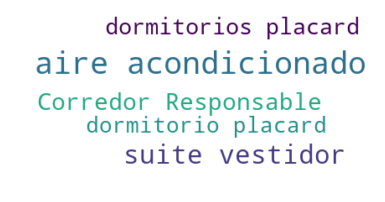

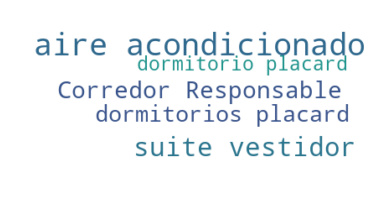

In [47]:
# Start with one review:
textprop=''
for i in dfprop.sample(20000).index:
    textprop+=str(dfprop.description[i])
textprop

#from stop_words import get_stop_words
stop_words=get_stop_words('spanish')

stop_words.append('cocina')
stop_words.append('comedor')
stop_words.append('living')
stop_words.append('baño')
stop_words.append('planta')
stop_words.append('baja')
stop_words.append('departamento')
stop_words.append('ID')
stop_words.append('MLS')
stop_words.append('bajo')
stop_words.append('mesada')
stop_words.append('dos')
stop_words.append('dos')

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=5, background_color="white",stopwords=stop_words).generate(textprop)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


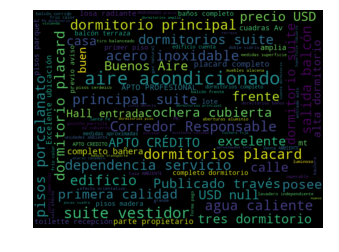

In [51]:

wordcloud = WordCloud(width=800,height=600,max_font_size=50, max_words=100, background_color="black",stopwords=stop_words).generate(textprop)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file('wcblack.png')

In [35]:
wordcloud.to_file('wc.png')

['a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f